In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

### Load Trained Model

In [16]:
model = tf.keras.models.load_model('dogs_breeds_cnn_fine_tuning.h5')

### Load result indexs

In [17]:
image_gen = ImageDataGenerator()
test_image_gen = image_gen.flow_from_directory('../DogsBreedsTrainingTestData/test',class_mode='categorical')

Found 4162 images belonging to 120 classes.


## Test Image

In [18]:
from keras.preprocessing.image import image
def check_dog_breed(dog_file):
    dog_img_original = image.load_img(dog_file,target_size=(224, 224))
    dog_img_resize = image.img_to_array(dog_img_original)
    dog_img_resize = np.expand_dims(dog_img_resize, axis=0)
    dog_img_resize = dog_img_resize/255
    
    prediction_prob = model.predict(dog_img_resize)
    df = pd.DataFrame([x[10:]  for x in test_image_gen.class_indices.keys()])
    df['predictions'] = prediction_prob[0]
    df = df.sort_values(by=['predictions'],ascending=False)
    df.columns = ['breed', 'predictions']
    
    names = df['breed'].values.tolist()[:3]
    values = df['predictions'].values.tolist()[:3]
    
    plt.imshow(dog_img_original)
    
    plt.text(10,180, 'LABEL: {}'.format(names[0]+ ' ' + str(values[0]*100)[:5] + '%'), 
             color='r', 
             backgroundcolor='w', 
             alpha=1.0)
    plt.text(10,200, 'LABEL: {}'.format(names[1]+ ' ' + str(values[1]*100)[:5] + '%'), 
             color='b', 
             backgroundcolor='w', 
             alpha=1.0)
    
    plt.text(10,220, 'LABEL: {}'.format(names[2]+ ' ' + str(values[2]*100)[:5] + '%'), 
             color='b', 
             backgroundcolor='w', 
             alpha=1.0)

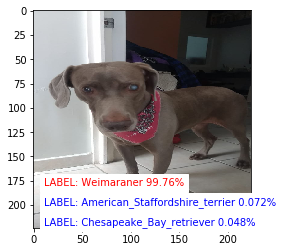

In [19]:
check_dog_breed('test_images/alice.jpg')

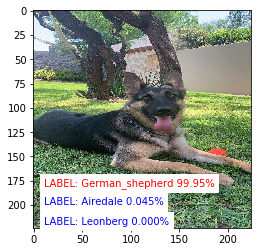

In [20]:
check_dog_breed('test_images/neska.jpg')

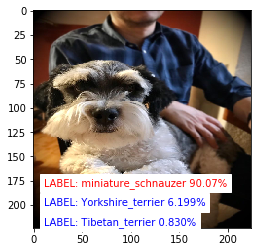

In [21]:
check_dog_breed('test_images/olidog.jpg')

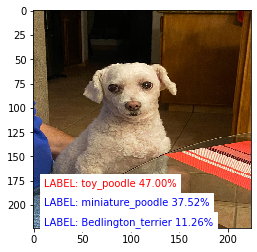

In [22]:
check_dog_breed('test_images/valedog.jpg')

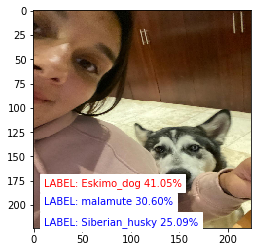

In [23]:
check_dog_breed('test_images/husky.jpg')

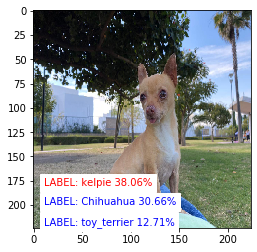

In [24]:
check_dog_breed('test_images/saki_one.jpg')

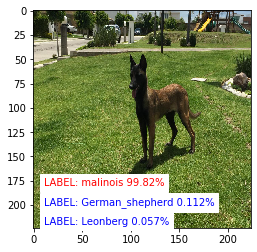

In [25]:
check_dog_breed('test_images/saki_two.jpg')

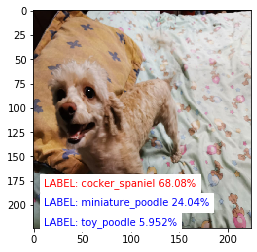

In [26]:
check_dog_breed('test_images/miguel_dog.jpg')

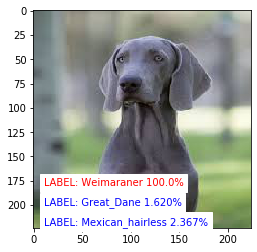

In [27]:
check_dog_breed('test_images/weimaraner.jpg')

### Convert to lite 

In [28]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("tf_model.tflite", "wb") as f:
  f.write(tflite_model)